In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X_train = np.linspace(-1,1,20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1,1,20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

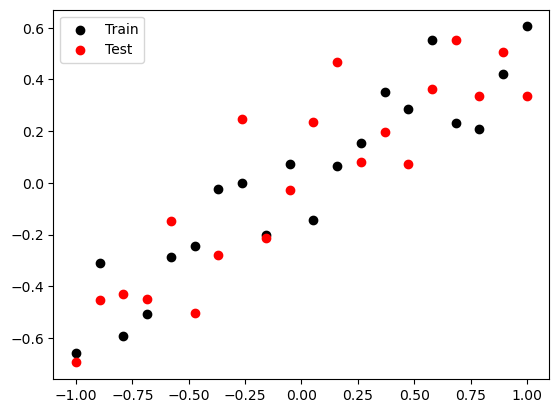

In [7]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.legend()

In [8]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics = ['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)

In [10]:
_, Train_mse = model.evaluate(X_train, y_train, verbose=0)
_, Test_mse = model.evaluate(X_test, y_test, verbose=0)

In [11]:
print('Train:',Train_mse,' Test:',Test_mse)

Train: 0.0027511310763657093  Test: 0.04391629248857498


In [13]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 17ms/step


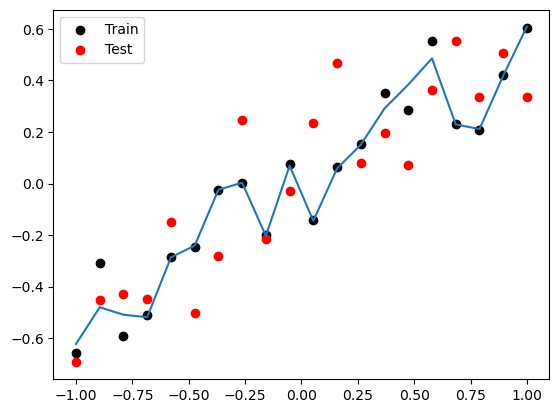

In [14]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, pred)
plt.legend()

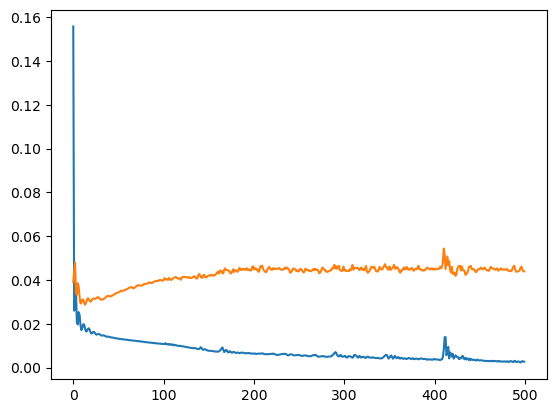

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Layers

In [23]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics = ['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)

In [24]:
_, Train_mse = model.evaluate(X_train, y_train, verbose=0)
_, Test_mse = model.evaluate(X_test, y_test, verbose=0)

In [25]:
print('Train:',Train_mse,' Test:',Test_mse)

Train: 0.01772690750658512  Test: 0.037734176963567734


In [26]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 44ms/step


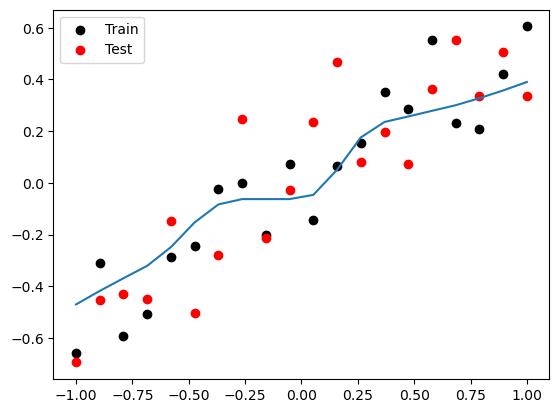

In [27]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, pred)
plt.legend()

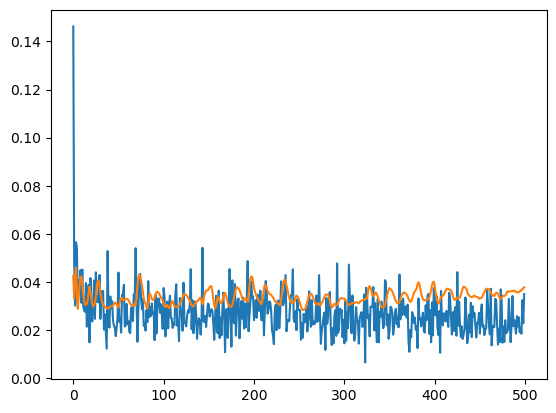

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])